# Paper ST Sloping - 16 beats

## Setup

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from imblearn.metrics import specificity_score
import random
import time

In [2]:
THREADS_TO_USE = 4

## Load dataset

In [3]:
data = pd.read_csv('../dataset/st_dataset_16beats.csv')
data = data.dropna()
data.head()

,id,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,...,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15,cfr_16,label
0,e0106,65.861928,67.716291,67.206386,18.973287,2.756737,0.736288,-0.634501,-1.015121,-0.279539,...,-0.038497,0.024202,-0.033980,0.046029,-0.071080,0.009209,-0.027384,-0.007471,-0.007113,NSR
1,e0106,67.175188,66.539171,66.278974,18.879508,2.752145,0.710574,-0.608829,-1.008338,-0.375129,...,-0.045707,0.028543,-0.033995,0.039226,-0.065687,-0.004942,-0.011601,-0.016082,-0.002783,NSR
2,e0106,67.331260,67.526064,67.904703,19.526248,2.883850,0.724048,-0.611290,-1.007119,-0.471325,...,-0.064803,0.051981,-0.056875,0.061396,-0.081542,0.009957,-0.023760,-0.019310,0.008258,NSR
3,e0106,66.507411,69.358972,68.845433,19.399284,2.811633,0.728870,-0.631538,-1.076715,-0.451683,...,-0.042918,0.033450,-0.043966,0.053377,-0.073200,0.002332,-0.021755,-0.003223,-0.021226,NSR
4,e0106,71.500586,69.600473,69.015425,19.518971,2.844739,0.706509,-0.610843,-1.008555,-0.438800,...,-0.047597,0.025825,-0.031552,0.048798,-0.093202,0.026254,-0.038423,-0.005951,-0.003403,NSR


In [4]:
data['label'].replace("ST-", "ST", inplace=True)
data['label'].replace("ST+", "ST", inplace=True)

In [5]:
data['label'].value_counts()

NSR    26200
ST      7965
Name: label, dtype: int64

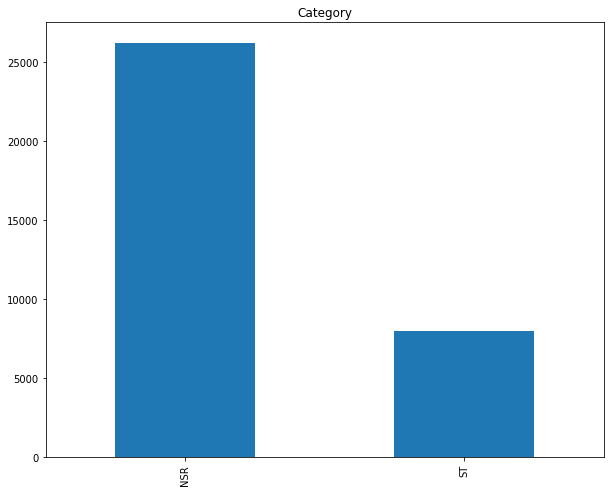

In [6]:
data['label'].value_counts().plot(kind='bar', title='Category', figsize=(10,8))
plt.show()

In [7]:
data.corr()

,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,mfw_5,...,cfr_7,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15,cfr_16
dw_1,1.000000,0.219210,0.101301,0.071494,0.053500,0.102907,-0.028753,0.044410,-0.002493,0.004377,...,-0.077538,-0.054871,-0.040977,-0.037365,-0.023672,-0.057237,-0.042960,-0.052143,-0.079161,-0.066310
dw_2,0.219210,1.000000,0.838628,0.486610,0.180151,0.408486,-0.502032,-0.337710,0.001285,0.018225,...,-0.123426,0.167397,0.237288,0.168364,0.049215,0.034692,0.128171,0.009246,-0.115564,-0.075292
dw_3,0.101301,0.838628,1.000000,0.680243,0.272747,0.255846,-0.548064,-0.460442,0.004292,0.010350,...,-0.203574,0.143928,0.272752,0.119350,-0.051559,0.061458,0.046053,-0.019790,-0.131894,-0.046861
dw_4,0.071494,0.486610,0.680243,1.000000,0.880644,-0.012857,-0.262781,-0.246875,0.003327,0.003775,...,-0.154983,0.064231,0.121135,0.050684,-0.040099,0.050791,0.024330,-0.029443,-0.102508,-0.042964
dw_5,0.053500,0.180151,0.272747,0.880644,1.000000,-0.126287,-0.018966,-0.039939,0.000859,0.000096,...,-0.070726,0.009459,0.007874,0.021196,0.000299,0.019165,0.013247,-0.034829,-0.053621,-0.029838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cfr_12,-0.057237,0.034692,0.061458,0.050791,0.019165,-0.138724,0.094631,0.121316,-0.001690,0.004790,...,-0.134379,-0.207376,-0.072612,0.035689,0.062709,1.000000,0.019376,0.001574,-0.345510,-0.225272
cfr_13,-0.042960,0.128171,0.046053,0.024330,0.013247,0.077703,-0.006064,0.009997,0.003478,-0.000130,...,0.147883,0.041925,-0.211124,-0.268978,-0.011602,0.019376,1.000000,0.223072,0.131959,-0.159064
cfr_14,-0.052143,0.009246,-0.019790,-0.029443,-0.034829,0.004839,0.022487,0.027808,0.003788,-0.003911,...,0.109109,0.222240,0.044405,-0.175685,-0.289441,0.001574,0.223072,1.000000,0.198522,-0.135727
cfr_15,-0.079161,-0.115564,-0.131894,-0.102508,-0.053621,0.045425,0.082850,0.052462,0.001549,-0.008696,...,0.279721,0.160473,-0.089826,-0.144377,-0.074435,-0.345510,0.131959,0.198522,1.000000,0.297959


In [8]:
y = data['label'].values
X = data.loc[:, ~data.columns.isin(["id", "label"])].copy()

In [9]:
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

## Feature selection

### Exclude features with corr > 0.95

In [10]:
correlated_features = set()
correlation_matrix = X.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [11]:
print(correlated_features)

{'fft_244', 'fft_248', 'fft_151', 'fft_165', 'fft_164', 'fft_216', 'fft_162', 'fft_177', 'fft_247', 'fft_202', 'fft_153', 'fft_238', 'fft_212', 'fft_249', 'fft_231', 'fft_181', 'fft_239', 'fft_243', 'fft_246', 'fft_191', 'fft_251', 'fft_167', 'fft_168', 'fft_138', 'fft_170', 'fft_155', 'fft_176', 'fft_228', 'fft_163', 'fft_182', 'fft_229', 'fft_196', 'fft_204', 'fft_205', 'mfw_7', 'fft_185', 'fft_187', 'mfw_8', 'fft_135', 'fft_145', 'fft_169', 'fft_195', 'fft_148', 'fft_156', 'mfw_14', 'cfr_16', 'fft_192', 'fft_190', 'fft_186', 'fft_158', 'fft_159', 'fft_213', 'fft_234', 'fft_142', 'fft_223', 'fft_178', 'fft_171', 'fft_201', 'fft_253', 'fft_200', 'fft_221', 'fft_207', 'fft_133', 'fft_226', 'fft_255', 'fft_217', 'fft_141', 'fft_188', 'fft_189', 'fft_206', 'fft_214', 'fft_147', 'fft_211', 'fft_139', 'fft_250', 'fft_132', 'fft_220', 'fft_143', 'fft_232', 'fft_227', 'fft_173', 'fft_245', 'fft_154', 'fft_134', 'fft_160', 'mfw_16', 'mfw_5', 'fft_161', 'fft_150', 'fft_179', 'fft_199', 'fft_14

### Random forest embeded for features selection

In [12]:
cols_no_corr = [col for col in X.columns if col not in correlated_features]

In [13]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(random_state=101, n_jobs=THREADS_TO_USE), threshold='1.25*median')
embeded_rf_selector.fit(X[cols_no_corr], y)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=4, random_state=101),
                threshold='1.25*median')

In [14]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X[cols_no_corr].loc[:,embeded_rf_support].columns.tolist()

print('\n'.join(embeded_rf_feature), '\nselected features:', len(embeded_rf_feature))

dw_1
dw_2
dw_3
dw_4
dw_5
mfw_1
mfw_2
mfw_3
mfw_4
fft_1
fft_2
fft_3
fft_4
fft_5
fft_6
fft_7
fft_8
fft_9
fft_10
fft_11
fft_12
fft_13
fft_14
fft_15
fft_16
fft_17
fft_18
fft_19
fft_20
fft_21
fft_22
fft_23
fft_24
fft_29
fft_30
fft_31
fft_32
fft_33
fft_34
fft_35
fft_36
ar_1
ar_2
ar_3
ar_4
ar_5
ar_6
ar_7
ar_8
ar_9
ar_10
ar_11
ar_12
ar_13
ar_14
ar_15
ar_16
var
cfr_1
cfr_2
cfr_3
cfr_4
cfr_5
cfr_6
cfr_7
cfr_8
cfr_9
cfr_10
cfr_11
cfr_12
cfr_13
cfr_14
cfr_15 
selected features: 73


### Visualization best features

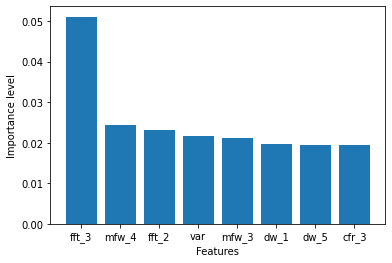

In [15]:
features_dict = dict(zip(cols_no_corr, embeded_rf_selector.estimator_.feature_importances_))
features_dict = dict(sorted(features_dict.items(), key=lambda item: item[1], reverse=True))

best_features = dict()
for index, (key, value) in enumerate(features_dict.items()):
    if index < 8:
        best_features[key] = value

plt.bar(range(len(best_features)), list(best_features.values()), align='center', )
plt.xticks(ticks=range(len(best_features)), labels=best_features.keys())
plt.xlabel('Features')
plt.ylabel('Importance level')
plt.show()

## Filter features

In [16]:
X_fsel = X[embeded_rf_feature]
X_fsel.head()

,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,fft_1,...,cfr_6,cfr_7,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15
0,65.861928,67.716291,67.206386,18.973287,2.756737,0.736288,-0.634501,-1.015121,-0.279539,0.905306,...,0.020720,0.039231,-0.038497,0.024202,-0.033980,0.046029,-0.071080,0.009209,-0.027384,-0.007471
1,67.175188,66.539171,66.278974,18.879508,2.752145,0.710574,-0.608829,-1.008338,-0.375129,-0.354970,...,0.009445,0.040896,-0.045707,0.028543,-0.033995,0.039226,-0.065687,-0.004942,-0.011601,-0.016082
2,67.331260,67.526064,67.904703,19.526248,2.883850,0.724048,-0.611290,-1.007119,-0.471325,1.782405,...,0.011313,0.048344,-0.064803,0.051981,-0.056875,0.061396,-0.081542,0.009957,-0.023760,-0.019310
3,66.507411,69.358972,68.845433,19.399284,2.811633,0.728870,-0.631538,-1.076715,-0.451683,-3.475203,...,0.013055,0.040612,-0.042918,0.033450,-0.043966,0.053377,-0.073200,0.002332,-0.021755,-0.003223
4,71.500586,69.600473,69.015425,19.518971,2.844739,0.706509,-0.610843,-1.008555,-0.438800,-1.080058,...,0.004456,0.042616,-0.047597,0.025825,-0.031552,0.048798,-0.093202,0.026254,-0.038423,-0.005951


## Random Forest - 1000x random split

In [17]:
classes = np.unique(label_encoder.inverse_transform(y))

result_df = pd.DataFrame()

split_seeds = random.sample(range(1, 2**32 - 1), 1000)
smote_seeds = random.sample(range(1, 2**32 - 1), 1000)
for i, (split_seed, smote_seed) in enumerate(zip(split_seeds, smote_seeds)):
    start_time = time.time()

    # Train and Test split
    x_train, x_test, y_train, y_test = train_test_split(X_fsel, y, test_size=0.2, random_state=split_seed)
    smote = SMOTE(random_state=smote_seed, n_jobs=THREADS_TO_USE)
    x_smote, y_smote = smote.fit_resample(x_train, y_train)

    # Training
    model = RandomForestClassifier(random_state=101, n_jobs=THREADS_TO_USE).fit(x_smote, y_smote)

    # Prediction
    y_pred = model.predict(x_test)

    # Decode
    y_test_dec = label_encoder.inverse_transform(y_test)
    y_pred_dec = label_encoder.inverse_transform(y_pred)

    # get metrics
    report = classification_report(y_true=y_test_dec, y_pred=y_pred_dec, output_dict=True)
    specificity = specificity_score(y_true=y_test_dec, y_pred=y_pred_dec, average="weighted")

    acc = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']


    # save result in result_df
    result_df = result_df.append({
        "accuracy": acc,
        "specificity": specificity,
        "precision": precision,
        "recall": recall,
        "f1": f1
     }, ignore_index=True)
    end_time = time.time()

    elapsed_seconds = end_time - start_time
    # Log result
    print("#---------------------#")
    print(i+1, "of", len(split_seeds), "-", elapsed_seconds, "s")
    print("Accuracy", acc, "precision", precision, "specificity", specificity, "recall", recall, "f1", f1)
    print("#---------------------#")

#---------------------#
1 of 1000 - 10.00189733505249 s
Accuracy 0.9278501390311723 precision 0.9280582765249591 specificity 0.874974256532364 recall 0.9278501390311723 f1 0.9279498539371704
#---------------------#
#---------------------#
2 of 1000 - 9.824832677841187 s
Accuracy 0.9341431289331187 precision 0.9337910071109814 specificity 0.8787596809327278 recall 0.9341431289331187 f1 0.9339464157902667
#---------------------#
#---------------------#
3 of 1000 - 9.768711566925049 s
Accuracy 0.9298990194643642 precision 0.9293954349414173 specificity 0.8621738619189023 recall 0.9298990194643642 f1 0.9296142078279875
#---------------------#
#---------------------#
4 of 1000 - 9.817463874816895 s
Accuracy 0.9296063222596225 precision 0.9299210164245244 specificity 0.8758431235949137 recall 0.9296063222596225 f1 0.9297542226691559
#---------------------#
#---------------------#
5 of 1000 - 9.885002374649048 s
Accuracy 0.9250695155861262 precision 0.9247002018836469 specificity 0.8596442456

In [18]:
result_df.head(10)

,accuracy,specificity,precision,recall,f1
0,0.927850,0.874974,0.928058,0.927850,0.927950
1,0.934143,0.878760,0.933791,0.934143,0.933946
2,0.929899,0.862174,0.929395,0.929899,0.929614
3,0.929606,0.875843,0.929921,0.929606,0.929754
4,0.925070,0.859644,0.924700,0.925070,0.924870
5,0.931948,0.874899,0.931789,0.931948,0.931865
6,0.937363,0.890581,0.937363,0.937363,0.937363
7,0.931509,0.875035,0.931604,0.931509,0.931555
8,0.933265,0.882559,0.933384,0.933265,0.933323
9,0.932241,0.876149,0.932167,0.932241,0.932203


In [19]:
print("######## Total ########")
print("Accuracy", result_df["accuracy"].mean())
print("Precision", result_df["precision"].mean())
print("Specificity",  result_df["specificity"].mean())
print("Recall",  result_df["recall"].mean())
print("F1",  result_df["f1"].mean())

result_df.to_csv('result/bin_16beats_smote_1000x_random_split.csv')

######## Total ########
Accuracy 0.9313112834772428
Precision 0.9314484816068016
Specificity 0.8779169959094805
Recall 0.9313112834772428
F1 0.9313648122610468
